In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import mlgrad.pca as pca

from sklearn.preprocessing import robust_scale, scale
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine


In [35]:
df = pd.read_csv("data/boston_housing.csv")
df.drop(columns=['zn', 'chas'], inplace=True)
df

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [36]:
X0 = df.values[:,:-1]
X0 = X0.astype('d')
X0 = scale(X0)
N = len(X0)
n = X0.shape[1]
print(X0.shape)

(506, 11)


In [37]:
pca_sk = PCA()
U0 = pca_sk.fit_transform(X0)

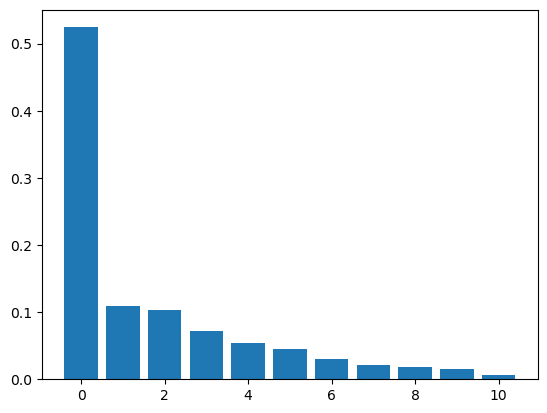

In [38]:
plt.bar(range(n), pca_sk.explained_variance_ratio_)
plt.show()

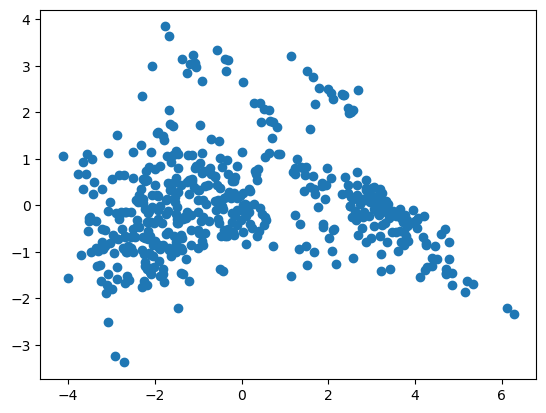

In [39]:
plt.scatter(U0[:,0], U0[:,1])
plt.show()

In [66]:
# alpha = (N-30) / N
alpha = 0.85
print(alpha)

0.85


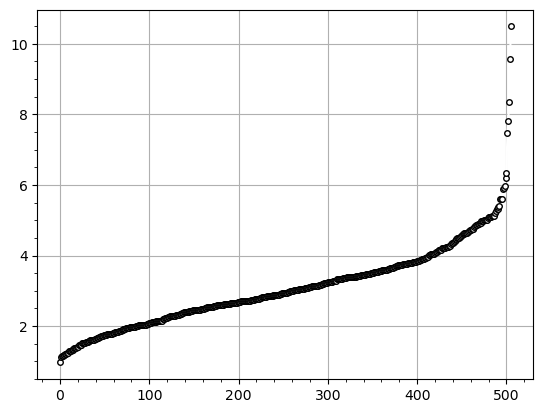

[-1.12338772e-16  2.10635198e-16 -1.96592852e-16 -1.08828186e-16
 -1.47444639e-16 -8.42540793e-17 -1.12338772e-16  0.00000000e+00
 -4.21270397e-16 -7.44244367e-16 -3.08931624e-16]


In [67]:
c0 = pca.location(X0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X0, c0), bins=40, rwidth=0.9)
plt.grid(1)
plt.minorticks_on()
plt.show()
print(c0)

[-1.12338772e-16  2.10635198e-16 -1.96592852e-16 -1.08828186e-16
 -1.47444639e-16 -8.42540793e-17 -1.12338772e-16  0.00000000e+00
 -4.21270397e-16 -7.44244367e-16 -3.08931624e-16]


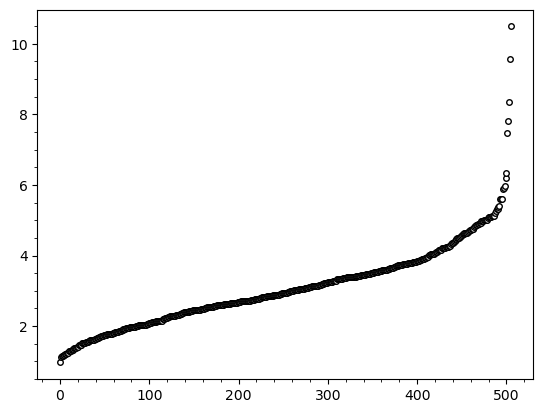

In [68]:
# alpha = (N - 15) / N
# print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
c = pca.robust_location(X0, wma)
print(c)
plt.plot(sorted(pca.distance_center(X0, c)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X0, c), bins=30, rwidth=0.9)
plt.minorticks_on()
plt.show()

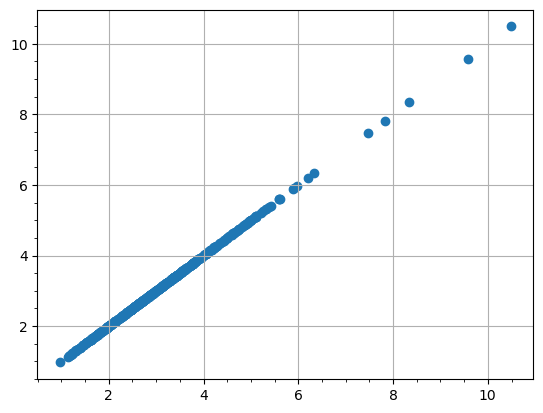

In [69]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [70]:
X1_0 = X0 - c0
X1 = X0 - c

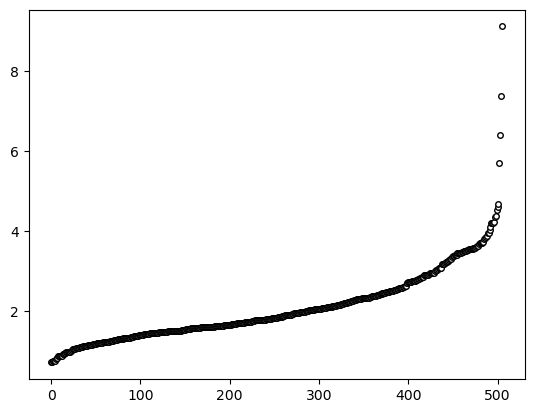

5.768656746190416 [ 0.26836769  0.35572867  0.35227448 -0.19315803  0.31693689 -0.32117869
  0.33866131  0.3587727   0.20723006 -0.21654562  0.32121362]


In [71]:
a1_0, L1_0 = pca.find_pc(X1_0)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X1_0, a1_0), bins=30, rwidth=0.9)
plt.show()
print(L1_0, a1_0)

4.5965634409999625 [ 0.21079684  0.35606728  0.35666404 -0.16240759  0.33966047 -0.32472492
  0.36545546  0.37403681  0.23308639 -0.16548441  0.31496702]


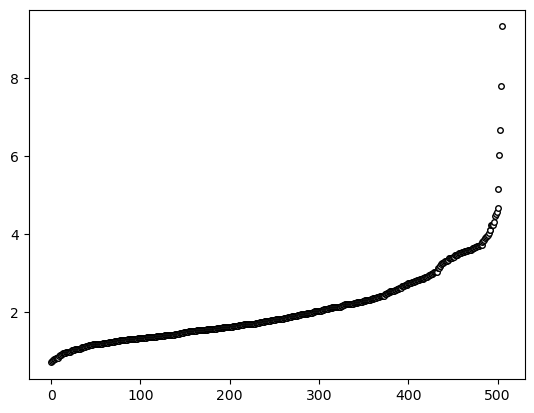

In [72]:
# alpha = (N - 15) / N
# print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
a1, L1 = pca.find_robust_pc(X1, wma)
print(L1, a1)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X1, a1), bins=30, rwidth=0.9)
plt.show()
U1 = pca.project_line(X1_0, a1)
U1_0 = pca.project_line(X1, a1_0)

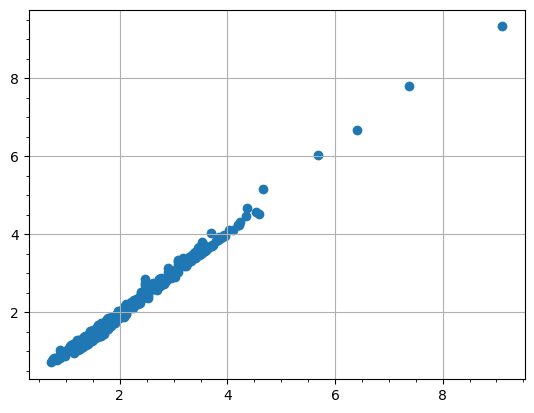

In [73]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [74]:
X2_0 = pca.project(X1_0, a1_0)
X2 = pca.project(X1, a1)

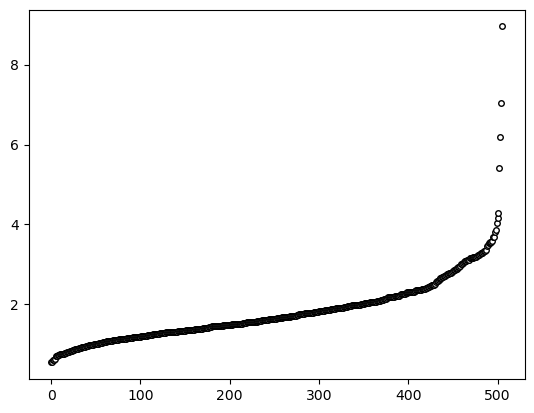

1.2046584918671213 [ 0.22697623 -0.13477308 -0.33545959 -0.37070574 -0.37728732  0.42182988
  0.19178723  0.14992346  0.52487679 -0.10492867  0.11962819]


In [75]:
a2_0, L2_0 = pca.find_pc(X2_0)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_line(X2_0, a2_0), bins=30, rwidth=0.9)
plt.show()
print(L2_0, a2_0)

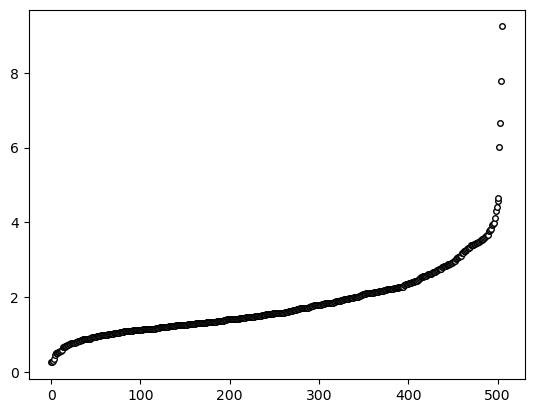

1.776734708957856 [ 0.00993406  0.06201632 -0.06440045 -0.80390374 -0.34699517  0.27833216
 -0.14066419 -0.01230861  0.1002707  -0.0062723   0.3431337 ]


In [76]:
# alpha = (N - 20) / N
# print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
a2, L2 = pca.find_robust_pc(X2, wma)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_line(X2, a2), bins=30, rwidth=0.9)
plt.show()
print(L2, a2)
U2 = pca.project_line(X2, a2)
U2_0 = pca.project_line(X2_0, a2_0)

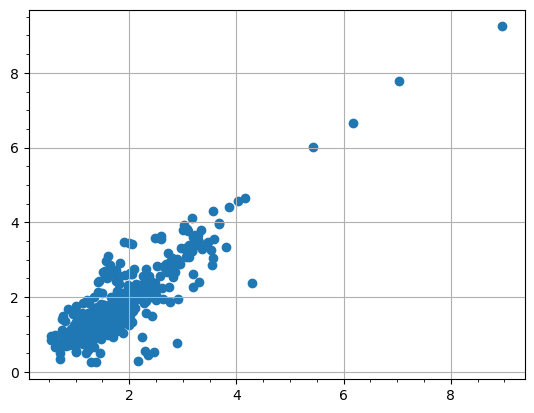

In [77]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [78]:
X3_0 = pca.project(X2_0, a2_0)
X3 = pca.project(X2, a2)

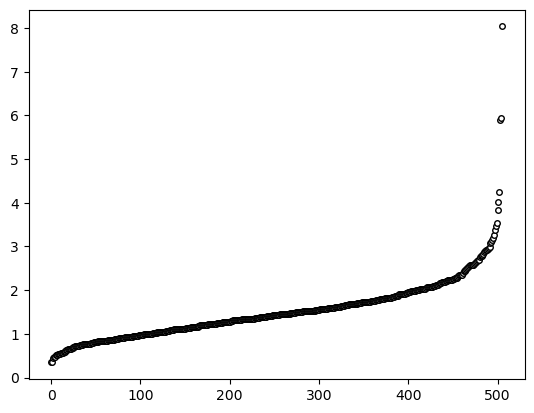

1.1433249487645383 [-0.32097684  0.10877541  0.03167306 -0.62706094  0.16504413 -0.06455884
 -0.35783893 -0.25231967  0.11296143  0.36975899  0.34399107]


In [79]:
a3_0, L3_0 = pca.find_pc(X3_0)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X3_0, a3_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_line(X3_0, a3_0), bins=30, rwidth=0.9)
plt.show()
print(L3_0, a3_0)

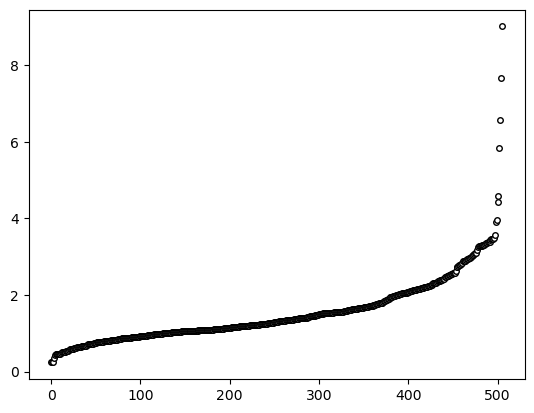

1.1370353612586985 [ 0.12678745 -0.03223078 -0.16031248  0.12470021 -0.48582615  0.30295361
  0.59384945  0.43792362  0.10097073  0.01375511 -0.24291848]


In [80]:
# alpha = (N - 20) / N
# print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
a3, L3 = pca.find_robust_pc(X3, wma)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X3, a3)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_line(X3, a3), bins=30, rwidth=0.9)
plt.show()
print(L3, a3)
U3 = pca.project_line(X3, a3)
U3_0 = pca.project_line(X3_0, a3_0)

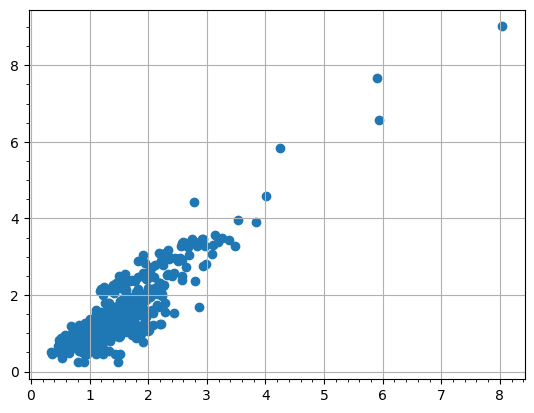

In [81]:
plt.scatter(pca.distance_line(X3_0, a3_0), pca.distance_line(X3, a3))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [82]:
from sklearn.decomposition import PCA

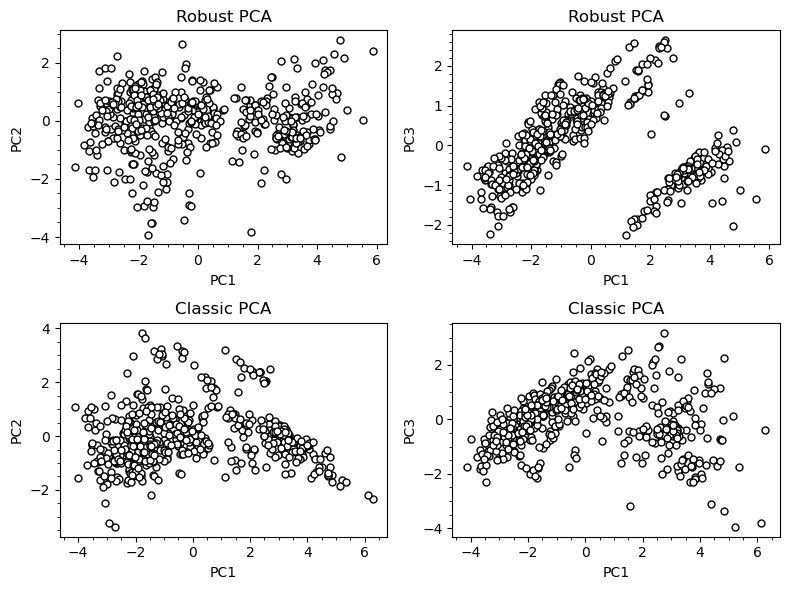

In [83]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.title('Robust PCA')
plt.scatter(U1, U2, s=25, c='w', edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.grid()
plt.minorticks_on()
plt.subplot(2,2,2)
plt.title('Robust PCA')
plt.scatter(U1, -U3, s=25, c='w', edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC3')
# plt.grid()
plt.minorticks_on()
plt.subplot(2,2,3)
plt.title('Classic PCA')
plt.scatter(U1_0, -U2_0, s=25, c='w', edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.grid()
plt.minorticks_on()
plt.subplot(2,2,4)
plt.title('Classic PCA')
plt.scatter(U1_0, U3_0, s=25, c='w', edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC3')
# plt.grid()
plt.minorticks_on()
plt.tight_layout()
plt.savefig('fig/robust_pca_cigarette.eps')
plt.show()

In [58]:
As_0, Ls_0, Us_0 = pca.find_pc_all(X1_0)

In [59]:
# N = len(X1)
# alpha = (N - 25) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
As, Ls, Us = pca.find_robust_pc_all(X1, wma)

0.9


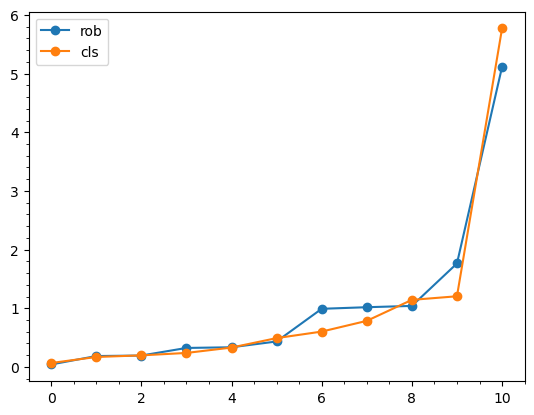

In [60]:
plt.plot(sorted(Ls), marker='o', label='rob')
plt.plot(sorted(Ls_0), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

In [61]:
Vs = np.array([np.var(U) for U in Us])
Vs_0 = np.array([np.var(U) for U in Us_0])
Vs /= Vs.sum()
Vs_0 /= Vs_0.sum()

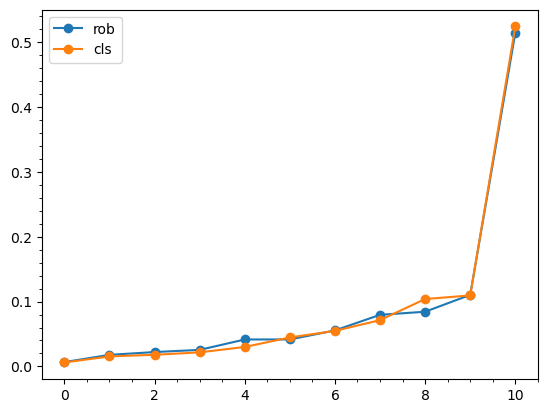

In [62]:
plt.plot(sorted(Vs), marker='o', label='rob')
plt.plot(sorted(Vs_0), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

In [63]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [64]:
S = robust_scatter_matrix(X1, wma)
# print(S)

[[ 3.53348494e+00  6.83018781e-02  1.61543321e-01  5.24577932e-02
   7.84105526e-02  2.64467079e-01 -1.33578091e+00 -1.51069368e-01
   1.70563658e-01  4.98487633e-02 -6.30927215e-01]
 [ 6.83018781e-02  2.00693423e+00 -4.72849572e-01  2.68450689e-01
  -1.17250605e-01  4.33402684e-01  7.06605539e-01 -1.51925909e+00
  -1.56149552e-01  2.78716287e-02  1.62832345e-01]
 [ 1.61543321e-01 -4.72849572e-01  2.33639764e+00  4.10717247e-02
  -4.26664036e-01  7.07497581e-01 -4.99949386e-01 -2.22785320e-01
   2.41784979e-01  1.45657295e-01 -2.67524295e-01]
 [ 5.24577932e-02  2.68450689e-01  4.10717247e-02  9.07673462e-01
  -1.72444281e-01  1.25288953e-01 -3.00630312e-01  8.95969601e-02
   1.84106329e-01  2.58177789e-01  5.34420960e-01]
 [ 7.84105526e-02 -1.17250605e-01 -4.26664036e-01 -1.72444281e-01
   1.11718814e+00  4.39297086e-01  1.34807236e-01  1.97449175e-02
  -7.05877290e-02 -2.07061318e-01 -3.17046103e-01]
 [ 2.64467079e-01  4.33402684e-01  7.07497581e-01  1.25288953e-01
   4.39297086e-01  

In [65]:
L, A = np.linalg.eig(S)
# print(A)
print(L/L.sum())

[0.37659148 0.18081964 0.13457743 0.09981881 0.06871456 0.05415117
 0.00220382 0.01090586 0.01850029 0.02587383 0.0278431 ]
